In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

In [3]:
df = pd.read_csv("cleaned_sentiment_data.csv")
df.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


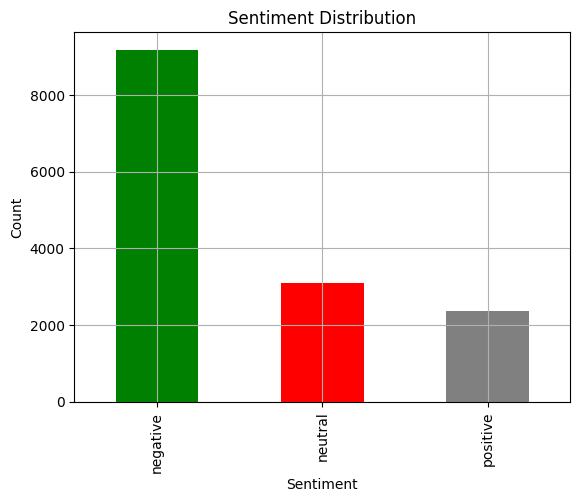

text         0
sentiment    0
dtype: int64


In [4]:
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print(df.isnull().sum())


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text) # remove URLs
    text = re.sub(r'@\w+', '', text)         # remove mentions
    text = re.sub(r'#\w+', '', text)         # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)     # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [8]:
sentiment_map = {'positive': 1, 'negative': -1, 'neutral': 0}
df['label'] = df['sentiment'].map(sentiment_map)

In [10]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label']

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.807035519125683
              precision    recall  f1-score   support

          -1       0.83      0.93      0.88      1889
           0       0.67      0.55      0.60       580
           1       0.82      0.61      0.70       459

    accuracy                           0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928

Confusion Matrix:
 [[1765   92   32]
 [ 234  317   29]
 [ 117   61  281]]


--- Naive Bayes ---
Accuracy: 0.7346311475409836
              precision    recall  f1-score   support

          -1       0.72      0.99      0.83      1889
           0       0.76      0.23      0.36       580
           1       0.90      0.32      0.48       459

    accuracy                           0.73      2928
   macro avg       0.80      0.52      0.56      2928
weighted avg       0.76      0.73      0.68      2928

Confusion Matrix:
 [[1866   19    4]
 [ 432  136   12]
 [

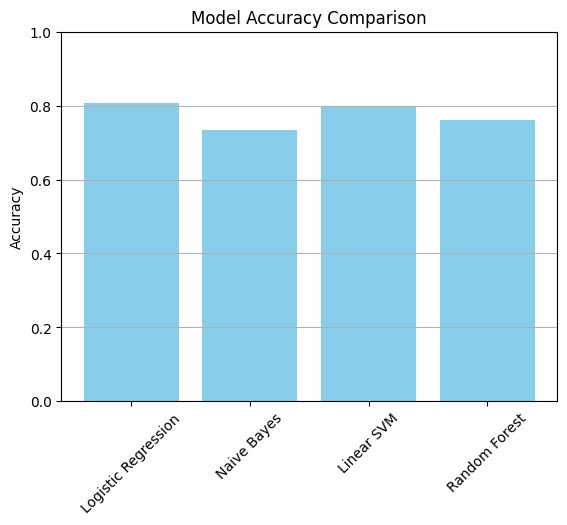

In [15]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [20]:
best_model = LogisticRegression()
best_model.fit(X, y)

# Save the best model
with open('best_sentiment_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)  
print("Best model saved as 'best_sentiment_model.pkl'")

Best model saved as 'best_sentiment_model.pkl'
